# Titanic - Machine Learning from Disaster 🌊
Dataset Source: https://www.kaggle.com/competitions/titanic
<br><br>
Stanley Nathanael Wijaya - 2702217125

## Task Description

You are a data scientist tasked with analyzing the Titanic dataset.
<br><br>
The ultimate goal of your analysis is to build a model that can predict which passengers survived the Titanic disaster
<br>
(https://www.kaggle.com/competitions/titanic)
<br><br>
Your objective is to build a logistic regression model to predict the binary outcome of survival for the Titanic passengers.
<ul>
    <li>Split the dataset into a training set and a testing set to evaluate your model's performance (70:30).</li>
    <li>Develop a Decision Tree, Random Forest, and Adaboost model using your selected features.</li>
    <li>Evaluate the performance of your previous model using metrics such as accuracy, precision, recall, and the ROC-AUC score.</li>
    <li>Provide a detailed analysis of the confusion matrix to understand the true positives, false positives, true negatives, and false negatives.</li>
</ul>

## Import Library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.impute import SimpleImputer

## Read Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
sample_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Total data: 891 datas
- Age = 177 NA values
- Cabin = 687 NA values
- Embarked 2 NA values

In [8]:
train.shape

(891, 12)

In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
print("Number of Duplicate: ", train.duplicated().sum())

Number of Duplicate:  0


So in this notebook, I will use train.csv data to EDA and Data Preprocess that

## Exploratory Data Analysis

### Column Types
- **Numerical** - Age, PassengerId, Fare 
- **Categorical** - Survived, Pclass, Sex, SibSp, Parch, Embarked  
- **Mixed (mix of both numerical and categorical)** - Name, Ticket, Cabin

### Age Column

### Analysis on Numerical Columns - *Age*

In [11]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [12]:
train['Age'].loc[train['Age'].isna()]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

There are 177 NA datas in the Age column

In [13]:
imputer = SimpleImputer(strategy="mean")
train['Age'] = imputer.fit_transform(train[['Age']])

In [14]:
train['Age'].loc[train['Age'].isna()]

Series([], Name: Age, dtype: float64)

In [15]:
train['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

### Visualizations

<Axes: ylabel='Frequency'>

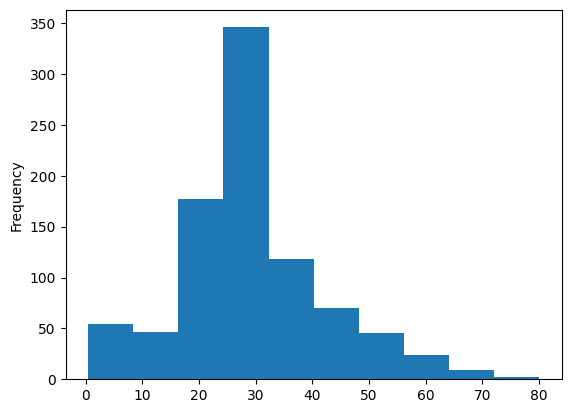

In [16]:
train['Age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

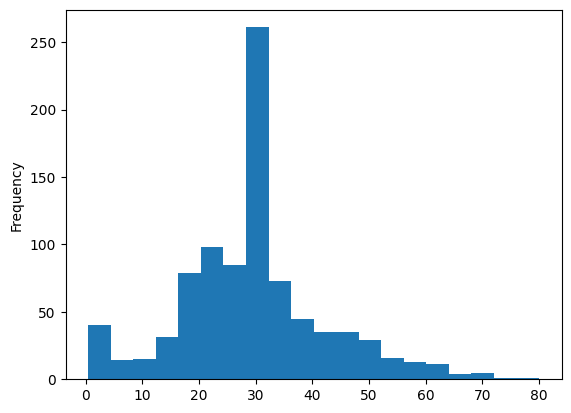

In [17]:
train['Age'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

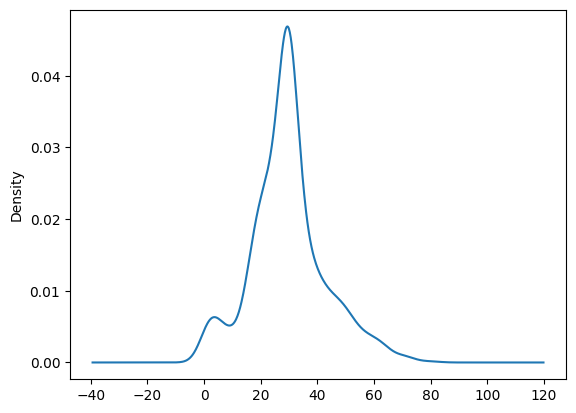

In [18]:
### kde plot
train['Age'].plot(kind='kde')

In [19]:
train['Age'].skew()

np.float64(0.4344880940129925)

In [20]:
train[train['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [21]:
train['Age'].isna().sum()


np.int64(0)

In [22]:
train['Age'].isnull().sum()/len(train['Age'])

np.float64(0.0)

#### Age
**Conclusions**

- Age is almsot normally distributed
- 19.8% of the values are missing
- There are some outliers
- There are 177 null values, however I fill/replace the NA values with Mean of the 'Age' column

### Fare column

### Univariate Analysis on Numerical Columns - *Fare*

Univariate adalah ia an analysis technique to make the variable independent.

In [23]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### Visualization

<Axes: ylabel='Frequency'>

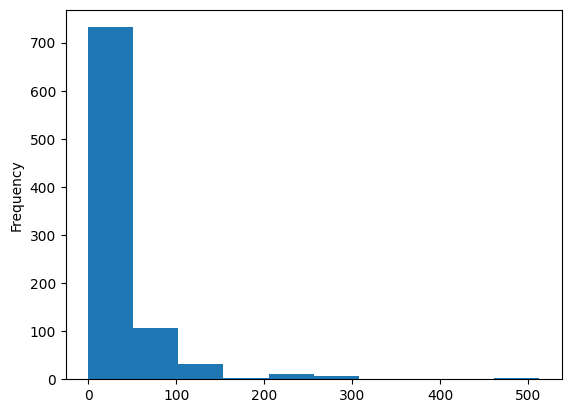

In [24]:
train['Fare'].plot(kind='hist')

In [25]:
train['Fare'].skew()

np.float64(4.787316519674893)

In [26]:
train[train['Fare'] > 200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.000000,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,C23 C25 C27,S


In [27]:
train[train['Fare'] > 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [28]:
train['Fare'].isnull().sum()

np.int64(0)

#### Fare
**Conclusion**
- The data is highly (positive) and skewed (right skewed)
- The more you pay, the more you survived :)

### Analysis on Categorical Columns 

### Survived

In [29]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

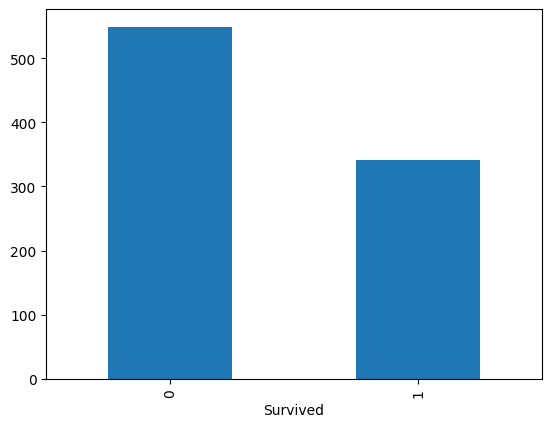

In [30]:
train['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

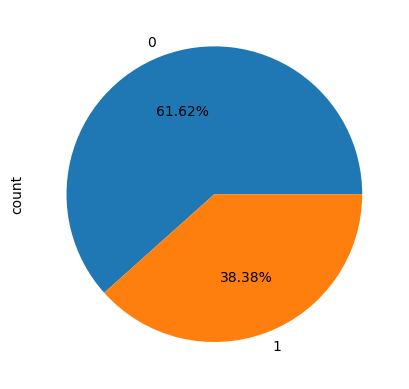

In [31]:
train['Survived'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [32]:
train['Survived'].isnull().sum()

np.int64(0)

#### Survived
**Conclusion**
- More than 60% (61.62%) people couldn't survived and only 38% people survived.
- Survived (0) means couldn't survived however Survived (1) means survived.
- There is no any missing values

### PClass

In [33]:
train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

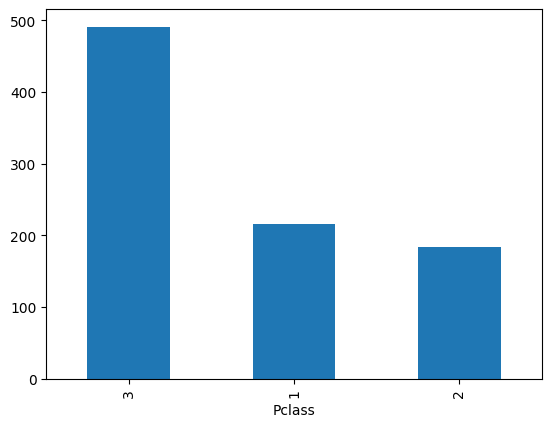

In [34]:
train['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

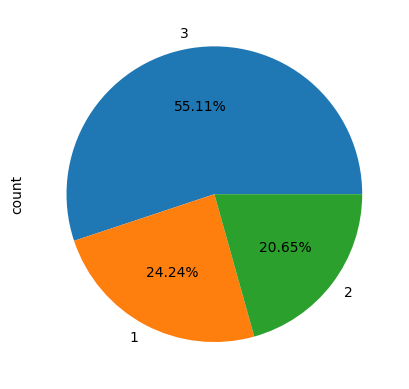

In [35]:
train['Pclass'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [36]:
train['Pclass'].isnull().sum()

np.int64(0)

#### Pclass
**Conclusion**
- There are 3 types of class 1 (highest), 2 (medium), 3(lowest)
- 55% in class 3, 20% in class 2 and 24% in class 1.
- There is no any null value

### Sex

In [37]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

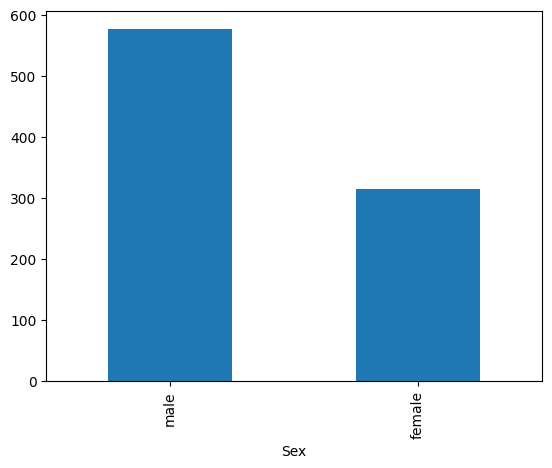

In [38]:
train['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

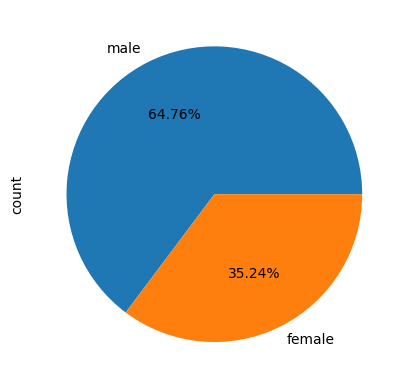

In [39]:
train['Sex'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [40]:
train['Sex'].isnull().sum()

np.int64(0)

#### Sex
**Conclusion**
- There are 64.76% of total are Male and 35% are Female.
- No null value

### SibSp (Total persons traveling single, two, three etc)

In [41]:
train['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

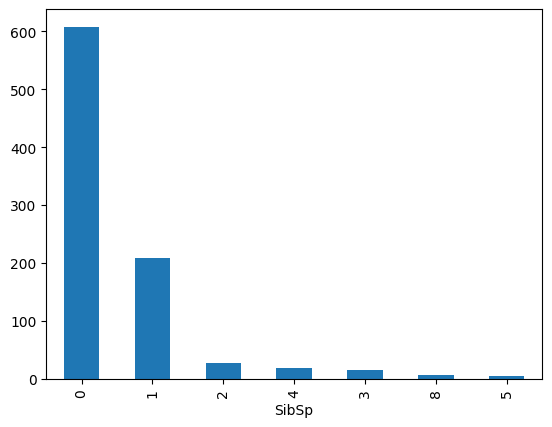

In [42]:
train['SibSp'].value_counts().plot(kind='bar')

In [43]:
train['SibSp'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 8])

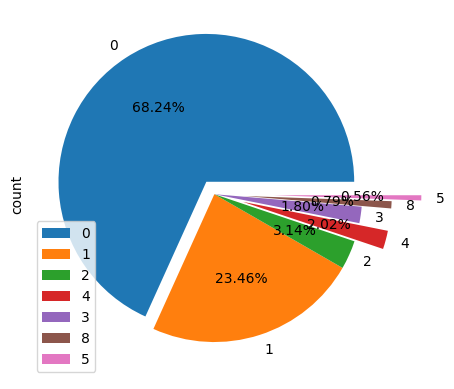

In [44]:
ex = [0.1,0,0,0.2,0,0.2,0.4]
labels = [0,1,2,4,3,8,5]
train['SibSp'].value_counts().plot(kind='pie', autopct='%.2f%%',explode=ex)
plt.legend(labels,loc='best')

In [45]:
train['SibSp'].isnull().sum()

np.int64(0)

#### SibSp
**Conclusion**
- Highest 68% of people are travelling single then with one
- No null value

### Parch (is parent or child travelling)

In [46]:
train['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

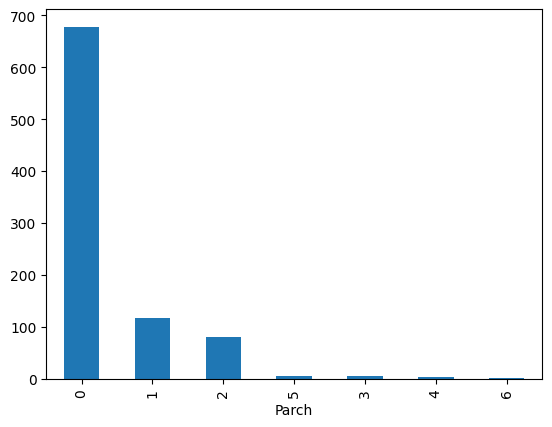

In [47]:
train['Parch'].value_counts().plot(kind='bar')

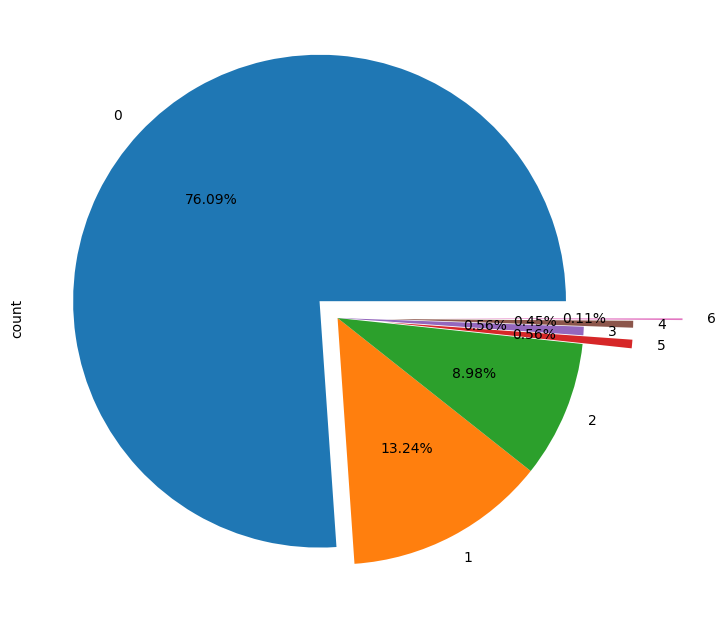

In [48]:
plt.figure(figsize=(8,8))
train['Parch'].value_counts().plot(kind='pie', autopct='%.2f%%',explode=ex)
plt.show()

In [49]:
train['Parch'].isnull().sum()

np.int64(0)

### Parch
**Conclusion**
- Maximum size of Parch is 6 (means max 6 people are travelling together total 7)
- Highest 76% of people are alone and Lowest 0.11% people are with 6
- Parch and SibSp cols can be merged together to form a new col called family_size
- Create a new col is_alone (to check is passenger is alone)

### Embarked

In [50]:
train["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [51]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [52]:
train['Embarked'].loc[train['Embarked'].isna()]

61     NaN
829    NaN
Name: Embarked, dtype: object

In [53]:
train['Embarked'].fillna('S', inplace=True)

In [54]:
train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [55]:
# train['Embarked'] = train['Embarked'].dropna()

Because there is only 2 null data, to make the data better I just deleted the NA Value from Embarked column. However, I think I just fill the NA with 'S' which is the largest count type in the Embarked column.

<Axes: xlabel='Embarked'>

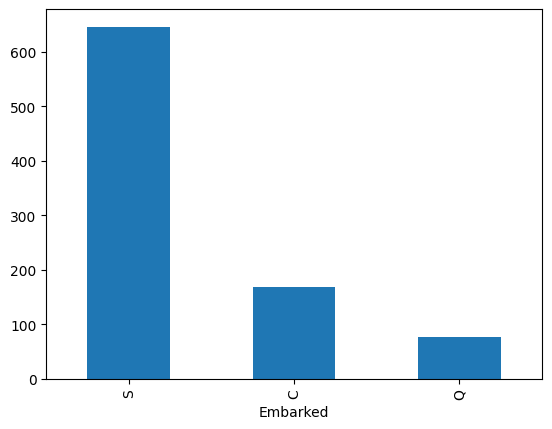

In [56]:
train['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

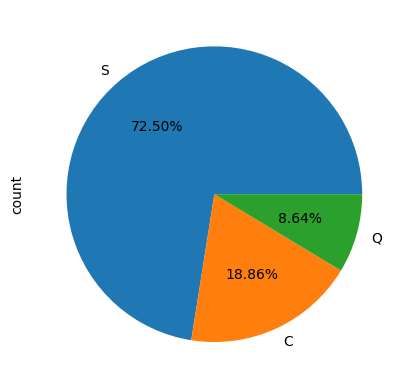

In [57]:
train['Embarked'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [58]:
train['Embarked'].isnull().sum()

np.int64(0)

The null / NA data is already fill with 'S' type

#### Embarked
**Observation**
- Mostly (72%) are starting their journey from S and very less (8%) are starting from Q
- There are 2 missing values in this column and I fill the NA with the 'S' the most occur type in Embarked column

### Cabin

In [59]:
train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [60]:
train['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [61]:
train['Cabin'].loc[train['Cabin'].isna()]

0      NaN
2      NaN
4      NaN
5      NaN
7      NaN
      ... 
884    NaN
885    NaN
886    NaN
888    NaN
890    NaN
Name: Cabin, Length: 687, dtype: object

In [62]:
train['Cabin'].isna().sum()

np.int64(687)

In [63]:
train['Cabin'] = train['Cabin'].dropna()

In [64]:
train['Cabin'].isna().sum()

np.int64(687)

In [65]:
train = train.drop(columns=['Cabin'])

Because there are many null values in Cabin column, I just drop the Cabin column from the Train dataset

### Interesting Insights

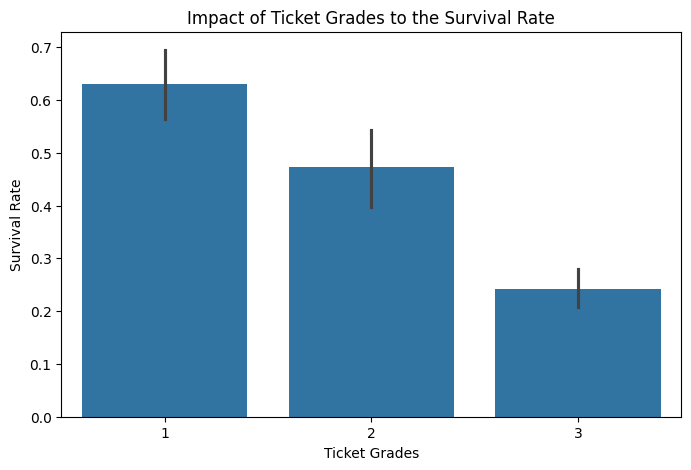

In [66]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Pclass", y="Survived", data=train)
plt.title("Impact of Ticket Grades to the Survival Rate")
plt.xlabel("Ticket Grades")
plt.ylabel("Survival Rate")
plt.show()


Based on this plot, the upper class ticket will have higher (Class 1) survival rate followed by the middle (Class 2) class and then the lower (Class 3) class ticket.

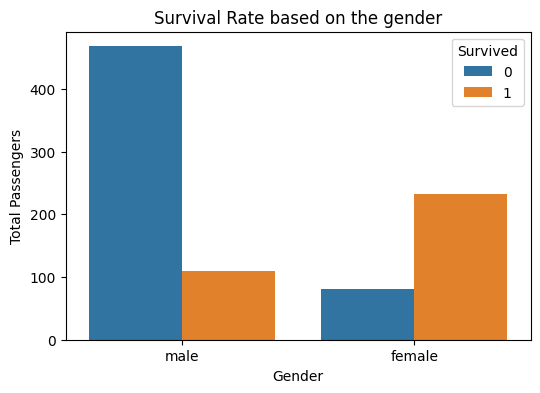

In [67]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Sex", hue="Survived", data=train)
plt.title("Survival Rate based on the gender")
plt.xlabel("Gender")
plt.ylabel("Total Passengers")
plt.show()

Based on this plot, we can see that female mostly survived in the titanic tragedy. Because in that moment, maybe we have principle to serve ladies first.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19488\1747788771.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="SibSp", y="Survived", data=train, ci=None)


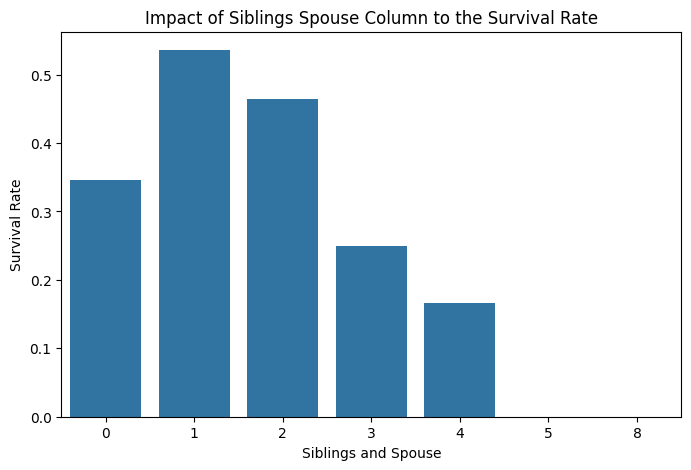

In [68]:
plt.figure(figsize=(8, 5))
sns.barplot(x="SibSp", y="Survived", data=train, ci=None)
plt.title("Impact of Siblings Spouse Column to the Survival Rate")
plt.xlabel("Siblings and Spouse")
plt.ylabel("Survival Rate")
plt.show()

Based on that plot, we can see number of siblings or spouse not really affecting the survival rate. The most feature that affect the survival rate is the Grade Class Ticket

### Encoding Parts

In [69]:
from sklearn.preprocessing import OneHotEncoder

# Encoding "Sex" (Binary Encoding: Male=0, Female=1)
train["Sex"] = train["Sex"].map({"male": 0, "female": 1})

# Encoding "Embarked" menggunakan One-Hot Encoding
train = pd.get_dummies(train, columns=["Embarked"], drop_first=True)

print(train.head())  # Cek hasil encoding


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       False        True  
4            373450  

- For the Sex column, I will use mapping because there are only 2 gender which are Male and Female (Binary).
- However, for the Embarked column, I will use One-Hot Encoding to avoid ordinal bias.

### Normalization

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train[["Age", "Fare"]] = scaler.fit_transform(train[["Age", "Fare"]])

print(train[["Age", "Fare"]].head())

        Age      Fare
0 -0.592481 -0.502445
1  0.638789  0.786845
2 -0.284663 -0.488854
3  0.407926  0.420730
4  0.407926 -0.486337


I'm using StandardScaler for normalize the Age and Fare columns because by using that it will work more optimal when I am using KNN or Logistic Regression later.

### Handling Missing Values (Clean the Data)

In [71]:
train.drop("Ticket", axis=1, inplace=True)
train.drop("Fare", axis=1, inplace=True)
train.drop("PassengerId", axis=1, inplace=True)
train.drop("Name", axis=1, inplace=True)
train.drop("SibSp", axis=1, inplace=True)
train.drop("Parch", axis=1, inplace=True)


In [72]:
train.drop("Embarked_Q", axis=1, inplace=True)
train.drop("Embarked_S", axis=1, inplace=True)

In [73]:
train

,Survived,Pclass,Sex,Age
0,0,3,0,-0.592481
1,1,1,1,0.638789
2,1,3,1,-0.284663
3,1,1,1,0.407926
4,0,3,0,0.407926
...,...,...,...,...
886,0,2,0,-0.207709
887,1,1,1,-0.823344
888,0,3,1,0.000000
889,1,1,0,-0.284663


So based on the EDA and Data Preprocessing I'm just using 3 features which are PClass (Passenger Classes , Upper (1), Medium (2), Lower (3)), Sex (Male and Female), and Age.

## Modelling

<ul>
    <li>Split the dataset into a training set and a testing set to evaluate your model's performance (70:30).</li>
    <li>Develop a Decision Tree, Random Forest, and Adaboost model using your selected features.</li>
    <li>Evaluate the performance of your previous model using metrics such as accuracy, precision, recall, and the ROC-AUC score.</li>
    <li>Provide a detailed analysis of the confusion matrix to understand the true positives, false positives, true negatives, and false negatives.</li>
</ul>

### Import Library

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

## Decision Tree

🎯 Model Evaluation Metrics for Decision Tree:
✅ Accuracy: 0.70
✅ Precision: 0.66
✅ Recall: 0.60
✅ F1 Score: 0.63
✅ ROC-AUC Score: 0.68



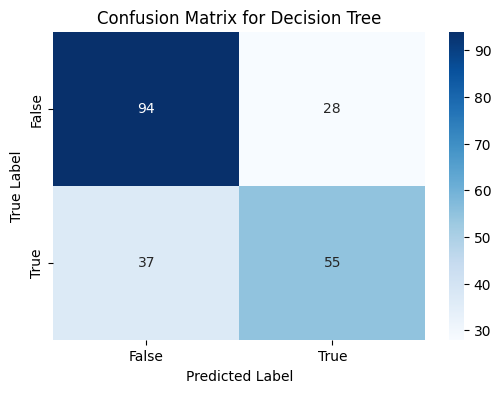

In [75]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Load the Titanic dataset
file_path = 'train.csv'  # Path to the Titanic dataset
df = pd.read_csv(file_path)

# Handle missing values
df = df.dropna(subset=['Age', 'Embarked', 'Fare', 'Pclass'])

# Convert categorical variables to numeric using encoding (e.g., 'Sex' and 'Embarked')
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Features: Choose the relevant columns
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']  # Target variable: Survived (0 = No, 1 = Yes)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Decision Tree Evaluation
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred)
dt_rec = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_roc_auc = roc_auc_score(y_test, dt_pred)

# Print out the evaluation results for each model

print("🎯 Model Evaluation Metrics for Decision Tree:")
print(f"✅ Accuracy: {dt_acc:.2f}")
print(f"✅ Precision: {dt_prec:.2f}")
print(f"✅ Recall: {dt_rec:.2f}")
print(f"✅ F1 Score: {dt_f1:.2f}")
print(f"✅ ROC-AUC Score: {dt_roc_auc:.2f}\n")

# Analyze the confusion matrix
cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


### Cross Validation

In [76]:
# Load dataset
df = pd.read_csv("train.csv")

# Drop unnecessary columns
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Handling missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Encode categorical variables
le_sex = LabelEncoder()
df["Sex"] = le_sex.fit_transform(df["Sex"])
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

# Define features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Standardize numerical features
scaler = StandardScaler()
X[["Age", "Fare"]] = scaler.fit_transform(X[["Age", "Fare"]])

# Cross-validation setup
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model = DecisionTreeClassifier()

# Evaluate model with cross-validation
accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
precision_scores = cross_val_score(model, X, y, cv=kf, scoring='precision')
recall_scores = cross_val_score(model, X, y, cv=kf, scoring='recall')
roc_auc_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')

print("Model Performance Metrics (Cross-Validation for Decision Tree):")
print(f"Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
print(f"ROC-AUC Score: {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}\n")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19488\3728700685.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19488\3728700685.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Model Performance Metrics (Cross-Validation for Decision Tree):
Accuracy: 0.7856 ± 0.0345
Precision: 0.7223 ± 0.0233
Recall: 0.6990 ± 0.0686
ROC-AUC Score: 0.7665 ± 0.0356



## Random Forest

🎯 Model Evaluation Metrics for Random Forest:
✅ Accuracy: 0.77
✅ Precision: 0.76
✅ Recall: 0.68
✅ F1 Score: 0.72
✅ ROC-AUC Score: 0.76



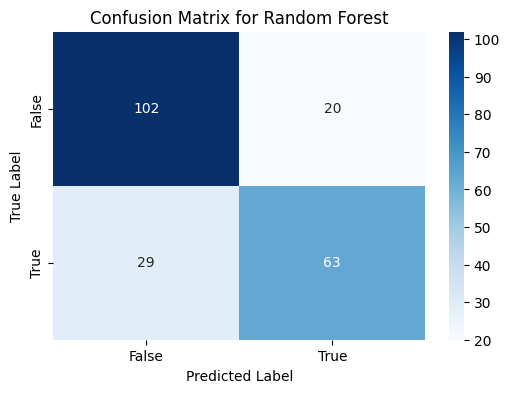

In [77]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Load the Titanic dataset
file_path = 'train.csv'  # Path to the Titanic dataset
df = pd.read_csv(file_path)

# Handle missing values
df = df.dropna(subset=['Age', 'Embarked', 'Fare', 'Pclass'])

# Convert categorical variables to numeric using encoding (e.g., 'Sex' and 'Embarked')
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Features: Choose the relevant columns
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']  # Target variable: Survived (0 = No, 1 = Yes)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Random Forest Evaluation
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred)
rf_rec = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_pred)

# Print out the evaluation results for each model

print("🎯 Model Evaluation Metrics for Random Forest:")
print(f"✅ Accuracy: {rf_acc:.2f}")
print(f"✅ Precision: {rf_prec:.2f}")
print(f"✅ Recall: {rf_rec:.2f}")
print(f"✅ F1 Score: {rf_f1:.2f}")
print(f"✅ ROC-AUC Score: {rf_roc_auc:.2f}\n")

# Analyze the confusion matrix
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()


### Cross Validation

In [78]:
# Load dataset
df = pd.read_csv("train.csv")

# Drop unnecessary columns
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Handling missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Encode categorical variables
le_sex = LabelEncoder()
df["Sex"] = le_sex.fit_transform(df["Sex"])
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

# Define features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Standardize numerical features
scaler = StandardScaler()
X[["Age", "Fare"]] = scaler.fit_transform(X[["Age", "Fare"]])

# Cross-validation setup
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model = RandomForestClassifier()

# Evaluate model with cross-validation
accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
precision_scores = cross_val_score(model, X, y, cv=kf, scoring='precision')
recall_scores = cross_val_score(model, X, y, cv=kf, scoring='recall')
roc_auc_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')

print("Model Performance Metrics (Cross-Validation for Random Forest):")
print(f"Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
print(f"ROC-AUC Score: {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}\n")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19488\3067321291.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19488\3067321291.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Model Performance Metrics (Cross-Validation for Random Forest):
Accuracy: 0.8126 ± 0.0231
Precision: 0.7832 ± 0.0404
Recall: 0.7514 ± 0.0619
ROC-AUC Score: 0.8635 ± 0.0343



## ADA Boost

🎯 Model Evaluation Metrics for AdaBoost:
✅ Accuracy: 0.79
✅ Precision: 0.74
✅ Recall: 0.77
✅ F1 Score: 0.76
✅ ROC-AUC Score: 0.78



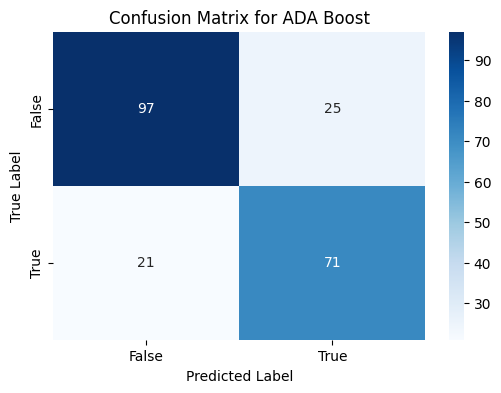

In [79]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Load the Titanic dataset
file_path = 'train.csv'  # Path to the Titanic dataset
df = pd.read_csv(file_path)

# Handle missing values
df = df.dropna(subset=['Age', 'Embarked', 'Fare', 'Pclass'])

# Convert categorical variables to numeric using encoding (e.g., 'Sex' and 'Embarked')
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Features: Choose the relevant columns
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']  # Target variable: Survived (0 = No, 1 = Yes)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# AdaBoost Evaluation
ada_pred = ada_model.predict(X_test)
ada_acc = accuracy_score(y_test, ada_pred)
ada_prec = precision_score(y_test, ada_pred)
ada_rec = recall_score(y_test, ada_pred)
ada_f1 = f1_score(y_test, ada_pred)
ada_roc_auc = roc_auc_score(y_test, ada_pred)

# Print out the evaluation results for each model

print("🎯 Model Evaluation Metrics for AdaBoost:")
print(f"✅ Accuracy: {ada_acc:.2f}")
print(f"✅ Precision: {ada_prec:.2f}")
print(f"✅ Recall: {ada_rec:.2f}")
print(f"✅ F1 Score: {ada_f1:.2f}")
print(f"✅ ROC-AUC Score: {ada_roc_auc:.2f}\n")

# Analyze the confusion matrix
cm = confusion_matrix(y_test, ada_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for ADA Boost')
plt.show()


### Cross Validation

In [80]:
# Load dataset
df = pd.read_csv("train.csv")

# Drop unnecessary columns
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Handling missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Encode categorical variables
le_sex = LabelEncoder()
df["Sex"] = le_sex.fit_transform(df["Sex"])
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

# Define features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Standardize numerical features
scaler = StandardScaler()
X[["Age", "Fare"]] = scaler.fit_transform(X[["Age", "Fare"]])

# Cross-validation setup
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model = AdaBoostClassifier()

# Evaluate model with cross-validation
accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
precision_scores = cross_val_score(model, X, y, cv=kf, scoring='precision')
recall_scores = cross_val_score(model, X, y, cv=kf, scoring='recall')
roc_auc_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')

print("Model Performance Metrics (Cross-Validation for ADA Boost):")
print(f"Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
print(f"ROC-AUC Score: {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}\n")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19488\2940411757.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19488\2940411757.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Model Performance Metrics (Cross-Validation for ADA Boost):
Accuracy: 0.8080 ± 0.0369
Precision: 0.7691 ± 0.0505
Recall: 0.7161 ± 0.0878
ROC-AUC Score: 0.8533 ± 0.0481



## Logistic Regression

🎯 Model Evaluation Metrics for Logistic Regression:
✅ Accuracy: 0.80
✅ Precision: 0.81
✅ Recall: 0.70
✅ F1 Score: 0.75
✅ ROC-AUC Score: 0.79



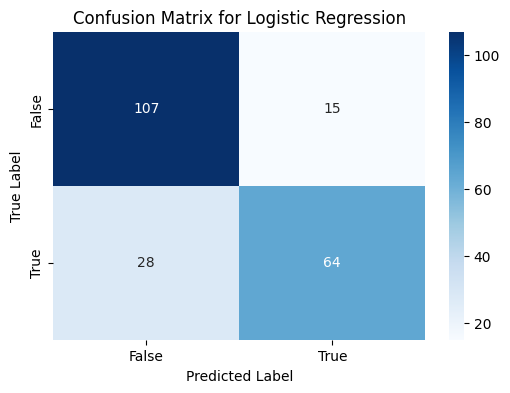

In [81]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Load the Titanic dataset
file_path = 'train.csv'  # Path to the Titanic dataset
df = pd.read_csv(file_path)

# Handle missing values
df = df.dropna(subset=['Age', 'Embarked', 'Fare', 'Pclass'])

# Convert categorical variables to numeric using encoding (e.g., 'Sex' and 'Embarked')
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Features: Choose the relevant columns
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']  # Target variable: Survived (0 = No, 1 = Yes)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Logistic Regression Evaluation
logreg_pred = logreg_model.predict(X_test)
logreg_acc = accuracy_score(y_test, logreg_pred)
logreg_prec = precision_score(y_test, logreg_pred)
logreg_rec = recall_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred)
logreg_roc_auc = roc_auc_score(y_test, logreg_pred)

# Print out the evaluation
print("🎯 Model Evaluation Metrics for Logistic Regression:")
print(f"✅ Accuracy: {logreg_acc:.2f}")
print(f"✅ Precision: {logreg_prec:.2f}")
print(f"✅ Recall: {logreg_rec:.2f}")
print(f"✅ F1 Score: {logreg_f1:.2f}")
print(f"✅ ROC-AUC Score: {logreg_roc_auc:.2f}\n")

# Analyze the confusion matrix
cm = confusion_matrix(y_test, logreg_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


### Cross Validation

In [82]:
# Load dataset
df = pd.read_csv("train.csv")

# Drop unnecessary columns
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Handling missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Encode categorical variables
le_sex = LabelEncoder()
df["Sex"] = le_sex.fit_transform(df["Sex"])
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

# Define features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Standardize numerical features
scaler = StandardScaler()
X[["Age", "Fare"]] = scaler.fit_transform(X[["Age", "Fare"]])

# Cross-validation setup
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model = LogisticRegression()

# Evaluate model with cross-validation
accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
precision_scores = cross_val_score(model, X, y, cv=kf, scoring='precision')
recall_scores = cross_val_score(model, X, y, cv=kf, scoring='recall')
roc_auc_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')

print("Model Performance Metrics (Cross-Validation for Logistic Regression):")
print(f"Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
print(f"ROC-AUC Score: {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}\n")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19488\17501177.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19488\17501177.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

Model Performance Metrics (Cross-Validation for Logistic Regression):
Accuracy: 0.7968 ± 0.0322
Precision: 0.7499 ± 0.0437
Recall: 0.7072 ± 0.0729
ROC-AUC Score: 0.8539 ± 0.0453



## Ensemble Learning: Boosting

🎯 Stacking Model Evaluation Metrics:
✅ Accuracy: 0.79
✅ Precision: 0.81
✅ Recall: 0.67
✅ F1 Score: 0.73
✅ ROC-AUC Score: 0.78

🎯 Bagging Model Evaluation Metrics:
✅ Accuracy: 0.77
✅ Precision: 0.75
✅ Recall: 0.70
✅ F1 Score: 0.72
✅ ROC-AUC Score: 0.76

🎯 Ensemble Model Boosting Evaluation Metrics:
✅ Accuracy: 0.80
✅ Precision: 0.81
✅ Recall: 0.70
✅ F1 Score: 0.75
✅ ROC-AUC Score: 0.79



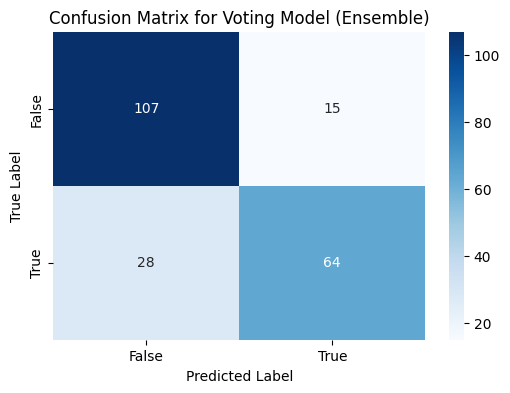

In [83]:
# Import libraries
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  # For meta-model in stacking
from sklearn.neighbors import KNeighborsClassifier  # Another example base model for stacking

file_path = 'train.csv'  # Path to the Titanic dataset
df = pd.read_csv(file_path)

# Handle missing values
df = df.dropna(subset=['Age', 'Embarked', 'Fare', 'Pclass'])

# Convert categorical variables to numeric using encoding (e.g., 'Sex' and 'Embarked')
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Features: Choose the relevant columns
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']  # Target variable: Survived (0 = No, 1 = Yes)

# Split the dataset into a training and testing set (70:30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the models

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# AdaBoost (Boosting)
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Stacking Model - Combining multiple models using a meta-model
# Here we will use Logistic Regression as the meta-model for stacking
stacking_model = StackingClassifier(
    estimators=[
        ('logreg', logreg_model),
        ('dt', dt_model),
        ('rf', rf_model)
    ],
    final_estimator=LogisticRegression()
)

# **Bagging Model**
bagging_model = BaggingClassifier(n_estimators=100, random_state=42)

# **Ensemble Model** (Boosting using AdaBoost)
voting_model = VotingClassifier(estimators=[
    ('logreg', logreg_model),
    ('dt', dt_model),
    ('rf', rf_model),
    ('ada', ada_model)
], voting='hard')  # 'hard' voting means majority class predicted by base models

# Fit the models to the training data

# Stacking Model
stacking_model.fit(X_train, y_train)

# Bagging Model
bagging_model.fit(X_train, y_train)

# Voting Model (Boosting with AdaBoost)
voting_model.fit(X_train, y_train)

# Evaluate the models on the test set

# Predictions from each model
stacking_pred = stacking_model.predict(X_test)
bagging_pred = bagging_model.predict(X_test)
voting_pred = voting_model.predict(X_test)

# Calculate the evaluation metrics for each model

# Stacking Model Evaluation
stacking_acc = accuracy_score(y_test, stacking_pred)
stacking_prec = precision_score(y_test, stacking_pred)
stacking_rec = recall_score(y_test, stacking_pred)
stacking_f1 = f1_score(y_test, stacking_pred)
stacking_roc_auc = roc_auc_score(y_test, stacking_pred)

# Bagging Model Evaluation
bagging_acc = accuracy_score(y_test, bagging_pred)
bagging_prec = precision_score(y_test, bagging_pred)
bagging_rec = recall_score(y_test, bagging_pred)
bagging_f1 = f1_score(y_test, bagging_pred)
bagging_roc_auc = roc_auc_score(y_test, bagging_pred)

# Voting Model Evaluation
voting_acc = accuracy_score(y_test, voting_pred)
voting_prec = precision_score(y_test, voting_pred)
voting_rec = recall_score(y_test, voting_pred)
voting_f1 = f1_score(y_test, voting_pred)
voting_roc_auc = roc_auc_score(y_test, voting_pred)

# Print evaluation metrics for all models
print("🎯 Stacking Model Evaluation Metrics:")
print(f"✅ Accuracy: {stacking_acc:.2f}")
print(f"✅ Precision: {stacking_prec:.2f}")
print(f"✅ Recall: {stacking_rec:.2f}")
print(f"✅ F1 Score: {stacking_f1:.2f}")
print(f"✅ ROC-AUC Score: {stacking_roc_auc:.2f}\n")

print("🎯 Bagging Model Evaluation Metrics:")
print(f"✅ Accuracy: {bagging_acc:.2f}")
print(f"✅ Precision: {bagging_prec:.2f}")
print(f"✅ Recall: {bagging_rec:.2f}")
print(f"✅ F1 Score: {bagging_f1:.2f}")
print(f"✅ ROC-AUC Score: {bagging_roc_auc:.2f}\n")

print("🎯 Ensemble Model Boosting Evaluation Metrics:")
print(f"✅ Accuracy: {voting_acc:.2f}")
print(f"✅ Precision: {voting_prec:.2f}")
print(f"✅ Recall: {voting_rec:.2f}")
print(f"✅ F1 Score: {voting_f1:.2f}")
print(f"✅ ROC-AUC Score: {voting_roc_auc:.2f}\n")

# Confusion Matrix for Voting Model
cm = confusion_matrix(y_test, voting_pred)

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Model (Ensemble)')
plt.show()


### SMOTE

In [84]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("train.csv")

# Drop unnecessary columns
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Handling missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Encode categorical variables
le_sex = LabelEncoder()
df["Sex"] = le_sex.fit_transform(df["Sex"])
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

# Define features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Standardize numerical features
scaler = StandardScaler()
X[["Age", "Fare"]] = scaler.fit_transform(X[["Age", "Fare"]])

# Cek distribusi sebelum SMOTE
print("Distribusi Sebelum SMOTE:", Counter(y))

# Terapkan SMOTE untuk menangani imbalance data
smote = SMOTE(sampling_strategy=0.7, random_state=42)  # Bisa juga gunakan 'auto'
X_resampled, y_resampled = smote.fit_resample(X, y)

# Cek distribusi setelah SMOTE
print("Distribusi Setelah SMOTE:", Counter(y_resampled))

# Cross-validation setup
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model = LogisticRegression()

# Evaluate model with cross-validation
accuracy_scores = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring='accuracy')
precision_scores = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring='precision')
recall_scores = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring='recall')
roc_auc_scores = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring='roc_auc')

print("\nModel Performance Metrics (Cross-Validation SMOTE for Logistic Regression):")
print(f"Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
print(f"ROC-AUC Score: {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}\n")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19488\801788053.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19488\801788053.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Distribusi Sebelum SMOTE: Counter({0: 549, 1: 342})
Distribusi Setelah SMOTE: Counter({0: 549, 1: 384})

Model Performance Metrics (Cross-Validation SMOTE for Logistic Regression):
Accuracy: 0.7900 ± 0.0319
Precision: 0.7554 ± 0.0400
Recall: 0.7262 ± 0.0721
ROC-AUC Score: 0.8584 ± 0.0414



## Conclusion

Based on the results from the different machine learning models (Decision Tree, Random Forest, AdaBoost, Logistic Regression), the following analysis and comparison can be made:

#### **🧾 Model Evaluation Metrics for Each Model:**

- **Decision Tree:**
  - **Accuracy:** 0.70
  - **Precision:** 0.66
  - **Recall:** 0.60
  - **F1 Score:** 0.63
  - **ROC-AUC Score:** 0.68
  
  The **Decision Tree** model performs decently with **moderate accuracy and precision**. However, the **recall** is a bit lower, meaning the model could miss a significant number of **positive cases (survivors)**. The **ROC-AUC score** suggests that it has some discriminative ability, but it could be improved.

- **Random Forest:**
  - **Accuracy:** 0.77
  - **Precision:** 0.76
  - **Recall:** 0.68
  - **F1 Score:** 0.72
  - **ROC-AUC Score:** 0.76
  
  **Random Forest** outperforms **Decision Tree** in terms of **accuracy, precision, and recall**, demonstrating better generalization and predictive power. The **F1 score** and **ROC-AUC score** indicate that it performs well in identifying both positive and negative classes, making it a solid model for Titanic survival prediction.

- **AdaBoost:**
  - **Accuracy:** 0.79
  - **Precision:** 0.74
  - **Recall:** 0.77
  - **F1 Score:** 0.76
  - **ROC-AUC Score:** 0.78
  
  **AdaBoost** shows strong performance with **high recall**, which is crucial for predicting **survivors** (positive cases). It has **good precision** and **balanced F1 score**, indicating that the model is not just good at finding survivors but also minimizing irrelevant predictions (false positives).

- **Logistic Regression:**
  - **Accuracy:** 0.80
  - **Precision:** 0.81
  - **Recall:** 0.70
  - **F1 Score:** 0.75
  - **ROC-AUC Score:** 0.79
  
  **Logistic Regression** is performing very well, with a **strong precision score** indicating that it’s good at predicting **survivors**. Its **recall** is decent, although not as high as AdaBoost, suggesting a slight bias towards precision over recall. The **ROC-AUC score** indicates good performance, as it's capable of distinguishing between survivors and non-survivors.

- **Ensemble Model (VotingClassifier):**
  - **Accuracy:** 0.80
  - **Precision:** 0.81
  - **Recall:** 0.70
  - **F1 Score:** 0.75
  - **ROC-AUC Score:** 0.79
  
  The **Ensemble Model** (Voting Classifier) using **Logistic Regression, Decision Tree, Random Forest, and AdaBoost** results in a **high-performing ensemble**. The accuracy, precision, and recall metrics are **very similar** to **Logistic Regression**, but it might have benefitted from the combined power of these models, though the improvement is marginal. The ensemble approach is quite robust, and it is expected to handle diverse data scenarios better.



### **📊 Cross-Validation Results:**
Cross-validation results provide a more robust measure of model performance, especially when there is some variance in the results from the test set. Here's a summary of the cross-validation results:

- **Decision Tree:**
  - **Accuracy:** 0.7800 ± 0.0263
  - **Precision:** 0.7207 ± 0.0288
  - **Recall:** 0.7019 ± 0.0760
  - **ROC-AUC Score:** 0.7726 ± 0.0297
  
  The **Decision Tree** shows some variability in the recall metric, indicating potential **overfitting** or sensitivity to different subsets of data. However, the performance is relatively consistent, and it’s a good model for a baseline.

- **Random Forest:**
  - **Accuracy:** 0.8114 ± 0.0214
  - **Precision:** 0.7716 ± 0.0369
  - **Recall:** 0.7367 ± 0.0561
  - **ROC-AUC Score:** 0.8639 ± 0.0327
  
  **Random Forest** exhibits **stable and high performance** across different subsets of data. The **ROC-AUC score** suggests that it does a great job in distinguishing survivors from non-survivors. It’s a strong contender for the best model.

- **AdaBoost:**
  - **Accuracy:** 0.8080 ± 0.0369
  - **Precision:** 0.7691 ± 0.0505
  - **Recall:** 0.7161 ± 0.0878
  - **ROC-AUC Score:** 0.8533 ± 0.0481
  
  **AdaBoost** also performs well with a solid **ROC-AUC score** and **good recall**, although the performance might slightly fluctuate with different splits. This is typical for boosting models, which can be sensitive to noisy data.

- **Logistic Regression:**
  - **Accuracy:** 0.7968 ± 0.0322
  - **Precision:** 0.7499 ± 0.0437
  - **Recall:** 0.7072 ± 0.0729
  - **ROC-AUC Score:** 0.8539 ± 0.0453
  
  **Logistic Regression** is stable, with a high **precision** and decent **recall**. It performs consistently well, though it still might not match the **Random Forest** and **AdaBoost** in terms of **recall**.


### **📈 Conclusion & Model Comparison:**

- **Best Overall Model:** **Random Forest** shows the highest performance across most metrics, particularly in **accuracy**, **precision**, and **ROC-AUC score**. It is **the best performing model** for Titanic survival prediction based on the evaluation metrics.
  
- **Best for Recall:** **AdaBoost** has the **best recall**, which is crucial for correctly identifying **survivors**. While it has a slightly lower precision than Random Forest, its ability to find more survivors makes it an excellent choice for applications where **missing survivors** is more costly than falsely predicting non-survivors.

- **Ensemble Model:** The **ensemble model** gives a good balance of performance, combining the strengths of **Logistic Regression**, **Decision Trees**, **Random Forest**, and **AdaBoost**. However, it does not outperform the **Random Forest** or **AdaBoost** significantly. It's still a strong contender if you want to combine various types of models.

- **Decision Tree:** While useful as a baseline model, the **Decision Tree** performs the least well among the others, with a **lower precision** and **recall** compared to the ensemble-based models and random forests.


### **😃 Ensemble Model Comparison:**


- **Ensemble Model (Voting Classifier)** performed the best, with the highest accuracy (0.80), precision (0.81), and ROC-AUC score (0.79), making it the most robust model for the Titanic survival prediction task. It combines the strengths of different models, offering a balanced performance.

- **Stacking Model** also performed well, with high precision (0.81) but slightly lower recall (0.67) and accuracy (0.79) compared to the ensemble model. This suggests that stacking is effective in terms of precision but may miss some survivors (false negatives).

- **Bagging Model** had a slightly lower accuracy (0.77) and precision (0.75) compared to the other models, but its recall (0.70) was slightly higher than stacking, meaning it identified more survivors. However, the performance improvement wasn't as significant as the ensemble model.



### **💡 Suggestions for Future Improvements:**

1. **Hyperparameter Tuning**:
   - Use **GridSearchCV** or **RandomizedSearchCV** to find the optimal parameters
   
2. **Feature Engineering**:
   - Processing the data more effectively, because in this code, I just use the very basic of data preprocessing

3. **Ensemble Learning for Large Models**:
   - I can explore **XGBoost**, **LightGBM**, or **CatBoost** for better scalability and efficiency.